In [7]:
import pathlib
import os
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import ICA
from mne import io
from mne.datasets import refmeg_noise

%matplotlib inline

plt.close('all')

bids_root = pathlib.Path('/storage/store2/data/Omega')

nb_subjects = 3
subjects = ['0221', '0258', '0312']
sessions = [1,2,2]
runs = [1,1,1]

In [2]:
# Ref meg raw and filtered
i = 0

raw_path = pathlib.Path(os.path.join(bids_root, "sub-"+subjects[i], 'ses-0'+str(sessions[i]), 'meg', "sub-"+subjects[i]+"_ses-0"+str(sessions[i])+"_task-rest_run-0"+str(runs[i])+"_meg.ds"))
raw = mne.io.read_raw_ctf(raw_path, verbose=False).load_data()
raw_filt = raw.copy().filter(0.1,49)

Reading 0 ... 719999  =      0.000 ...   300.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 12.25 Hz (-6 dB cutoff frequency: 55.12 Hz)
- Filter length: 79201 samples (33.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:   15.5s finished


Using matplotlib as 2D backend.


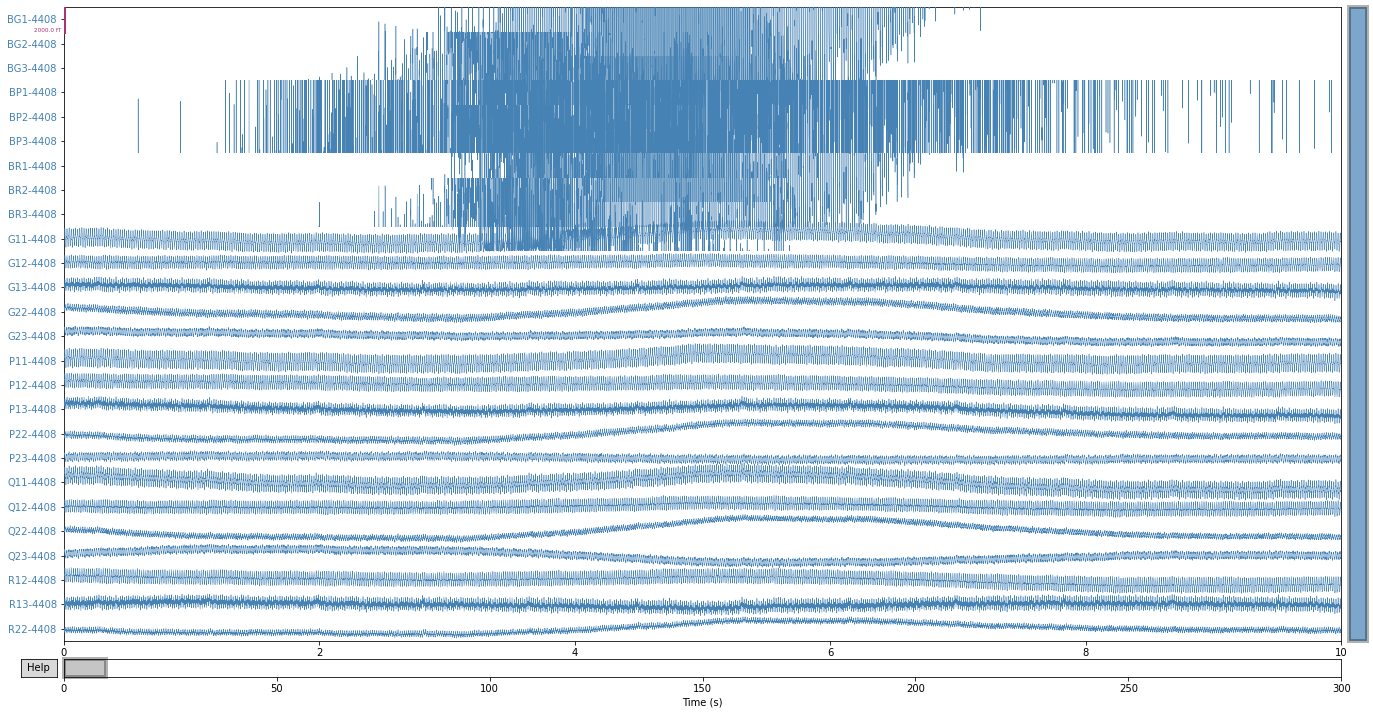

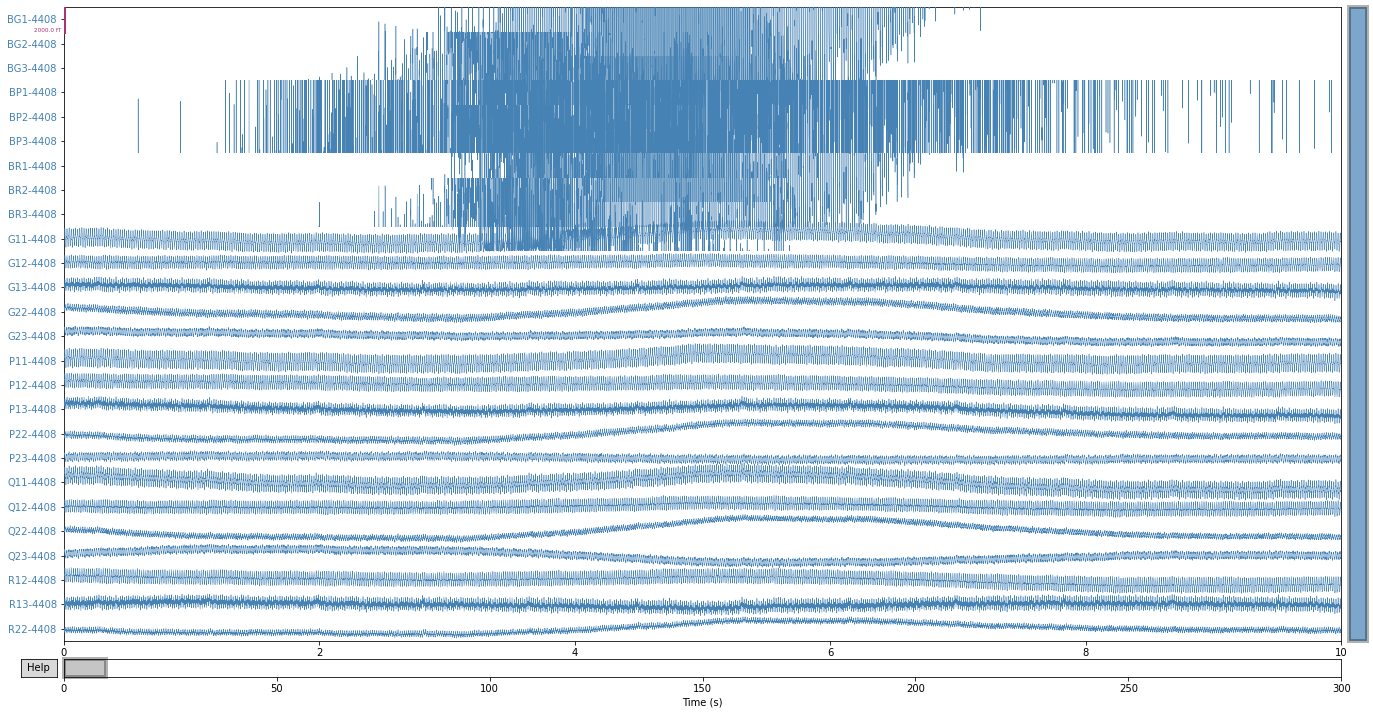

In [4]:
raw.copy().pick('ref_meg').plot(n_channels=26, duration=10.0)

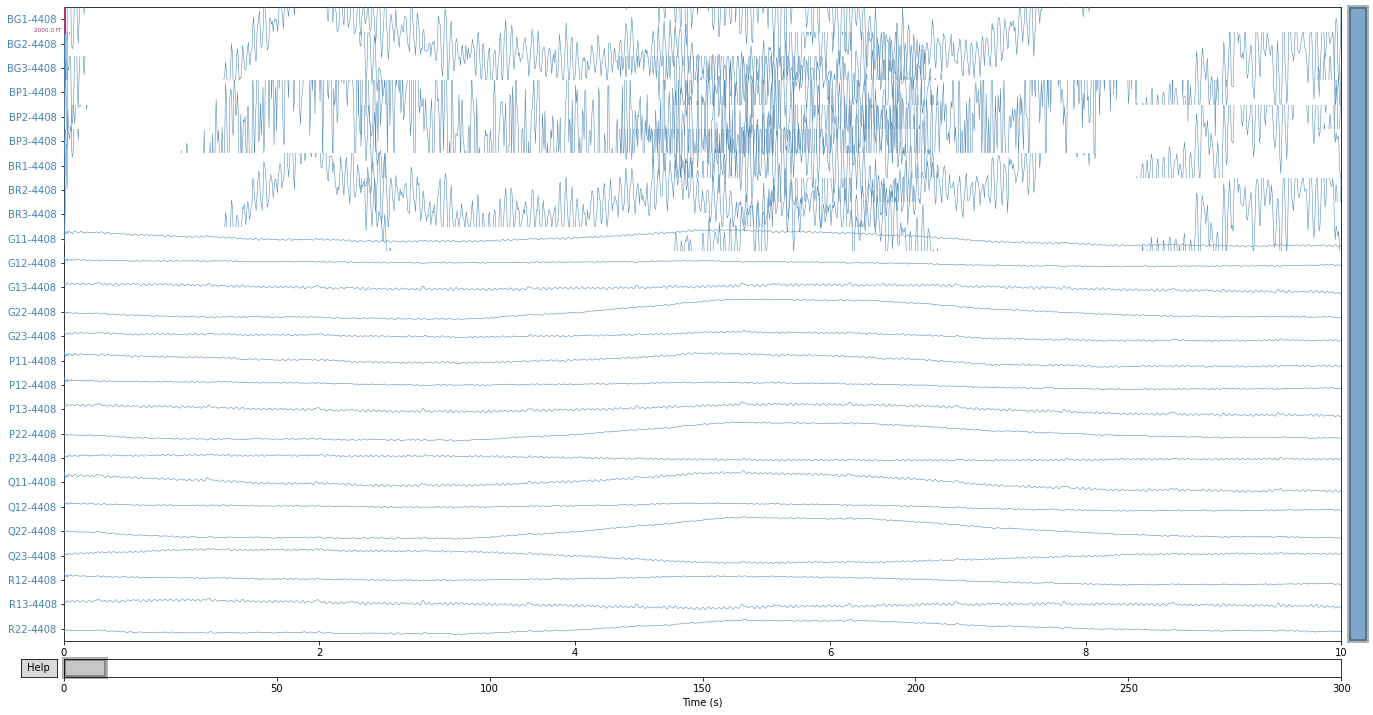

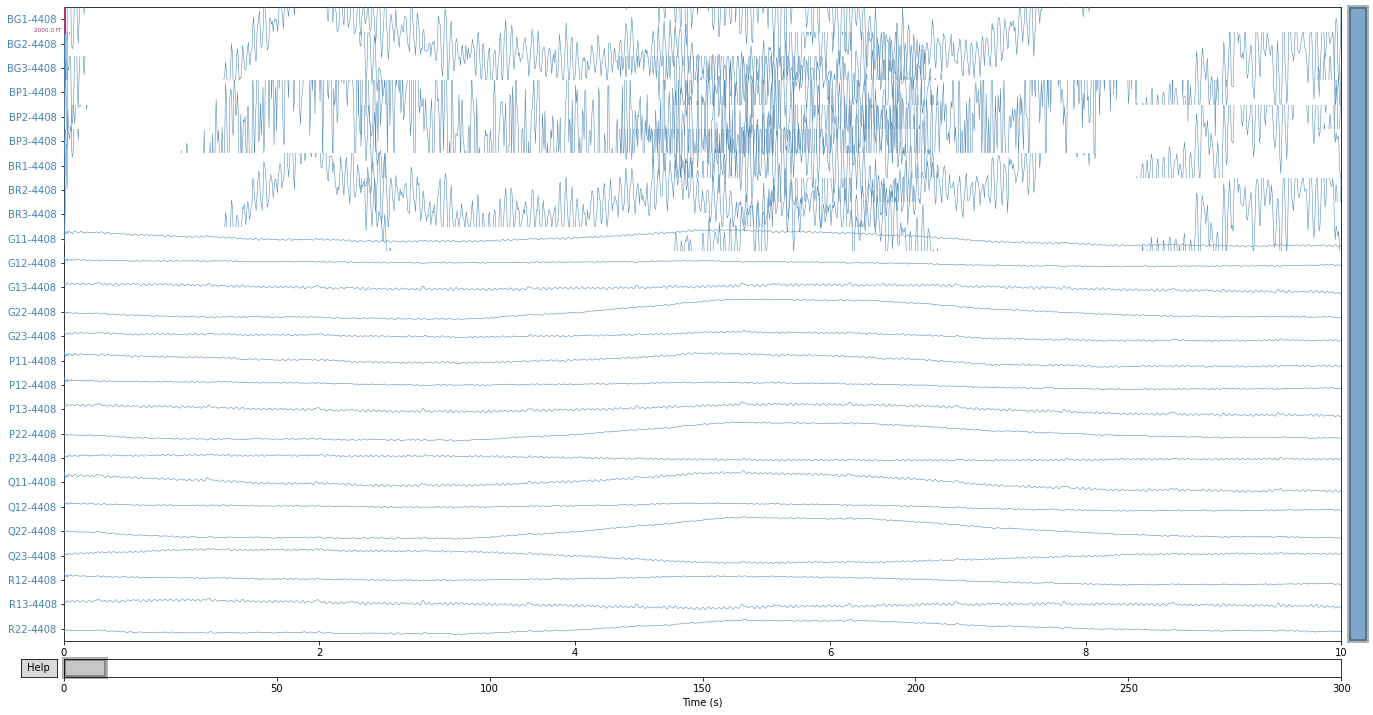

In [5]:
raw_filt.copy().pick('ref_meg').plot(n_channels=26, duration=10.0)

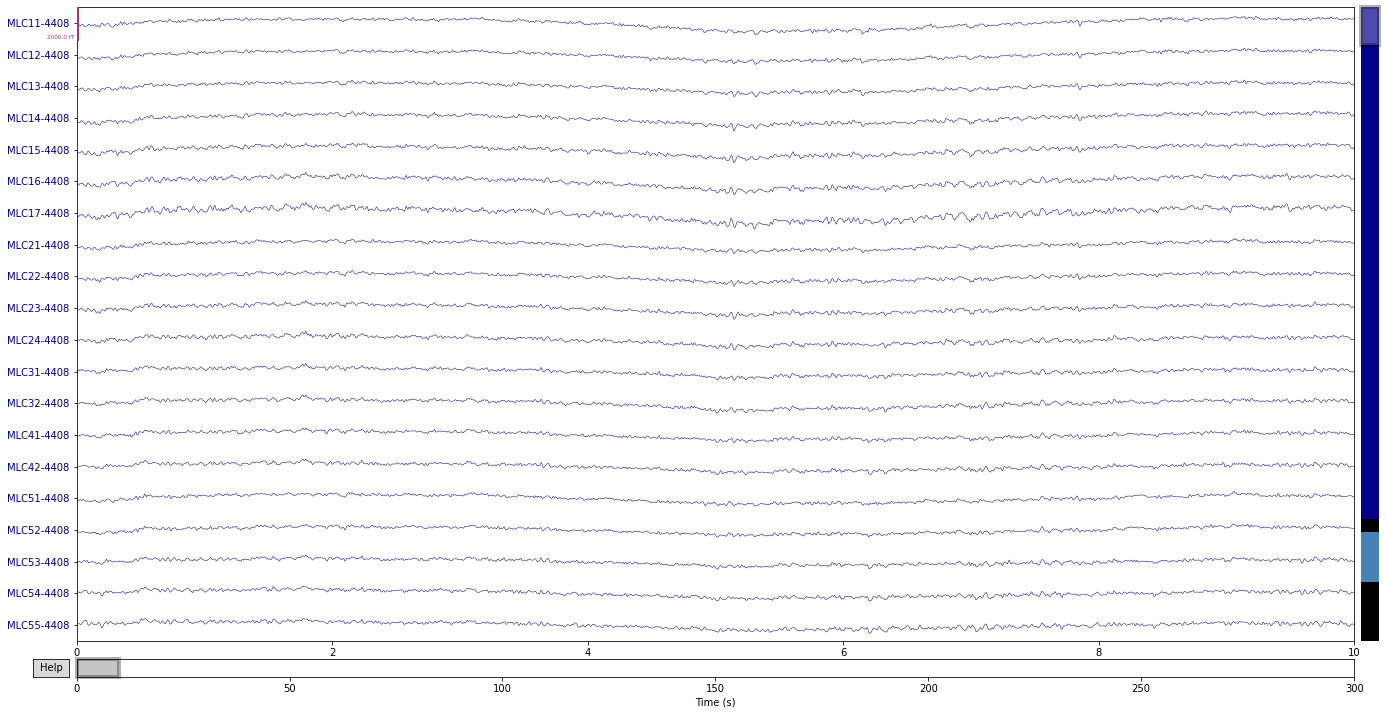

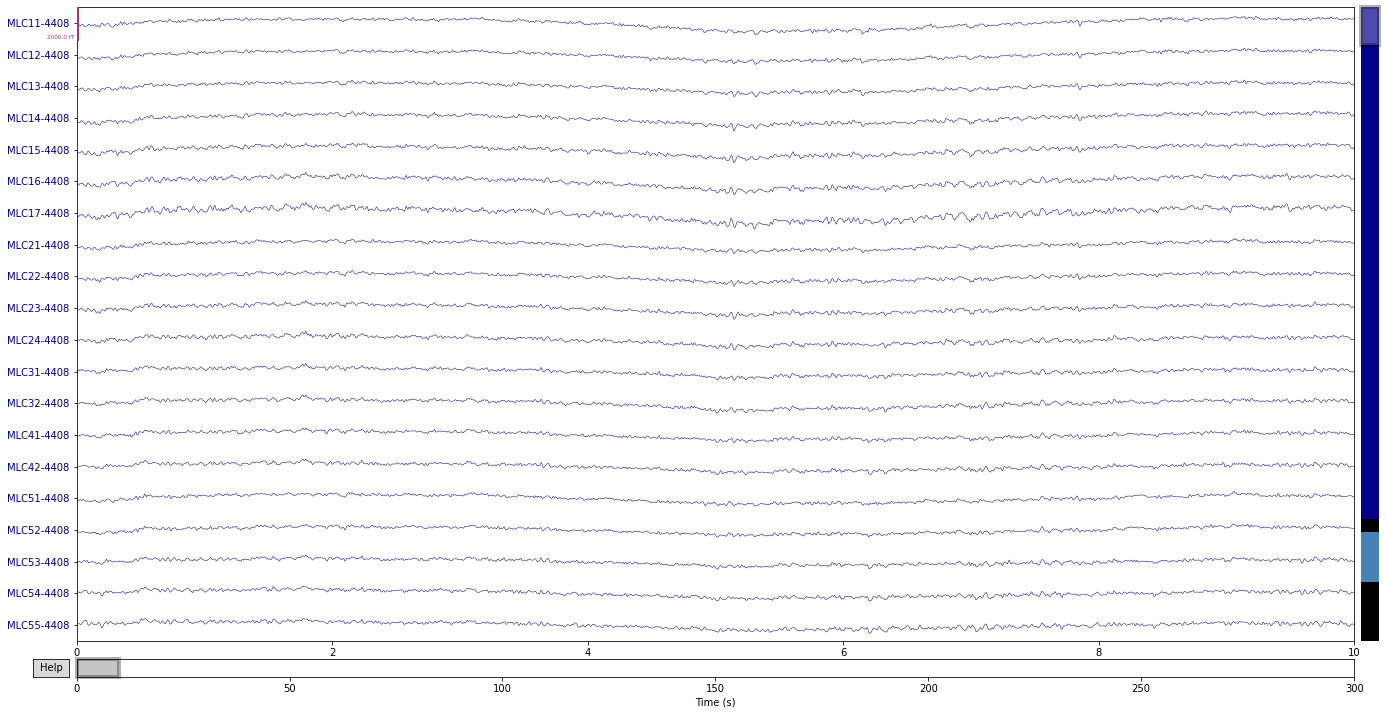

In [6]:
raw_filt.plot()

Effective window size : 1.707 (s)
Removing 5 compensators from info because not all compensation channels were picked.


c:\Users\katio\AppData\Local\Programs\Python\Python37\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


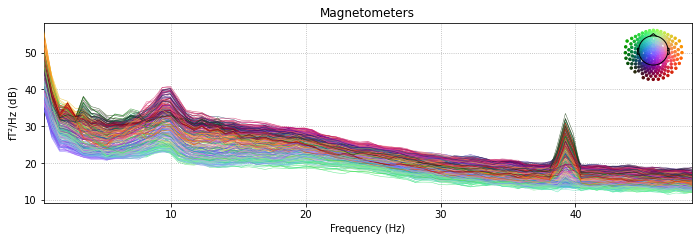

In [10]:
raw_filt.compute_psd(picks = 'meg', n_fft = 4096, fmin = 0.1, fmax = 49).plot()
plt.show()

Removing 5 compensators from info because not all compensation channels were picked.


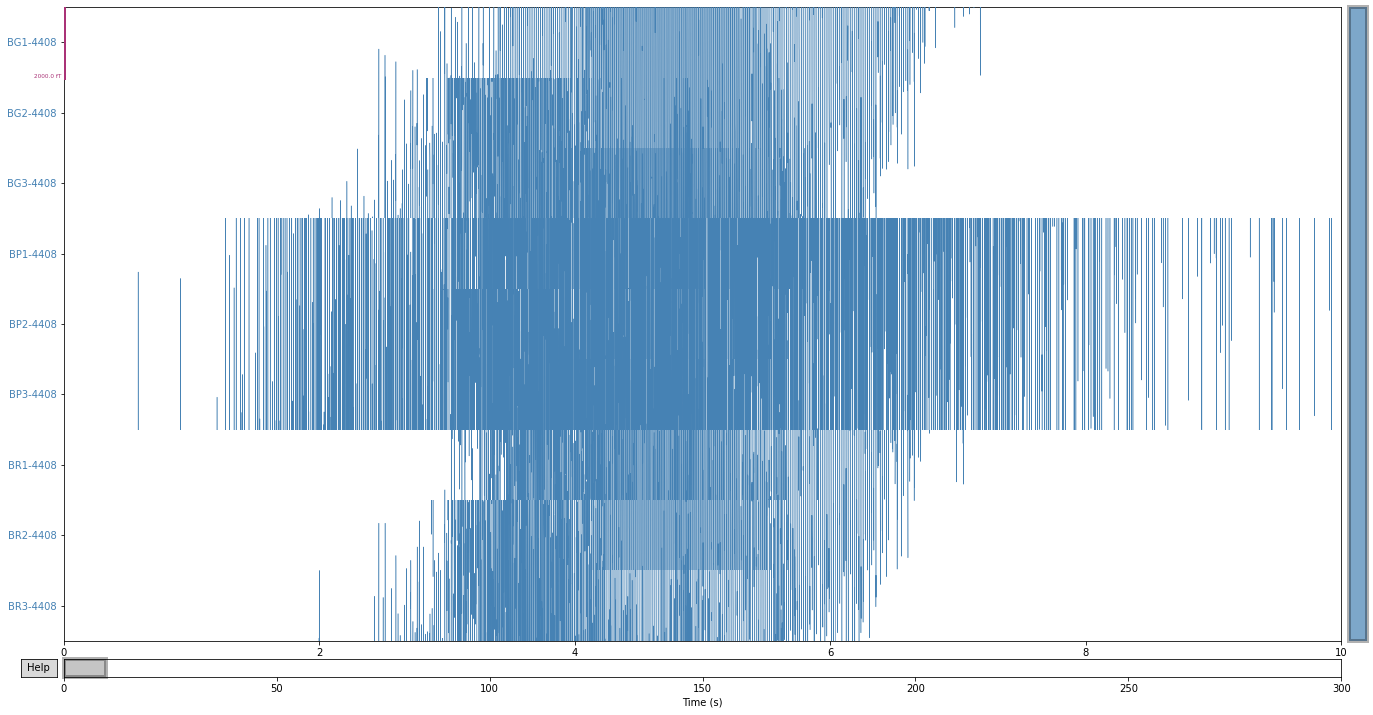

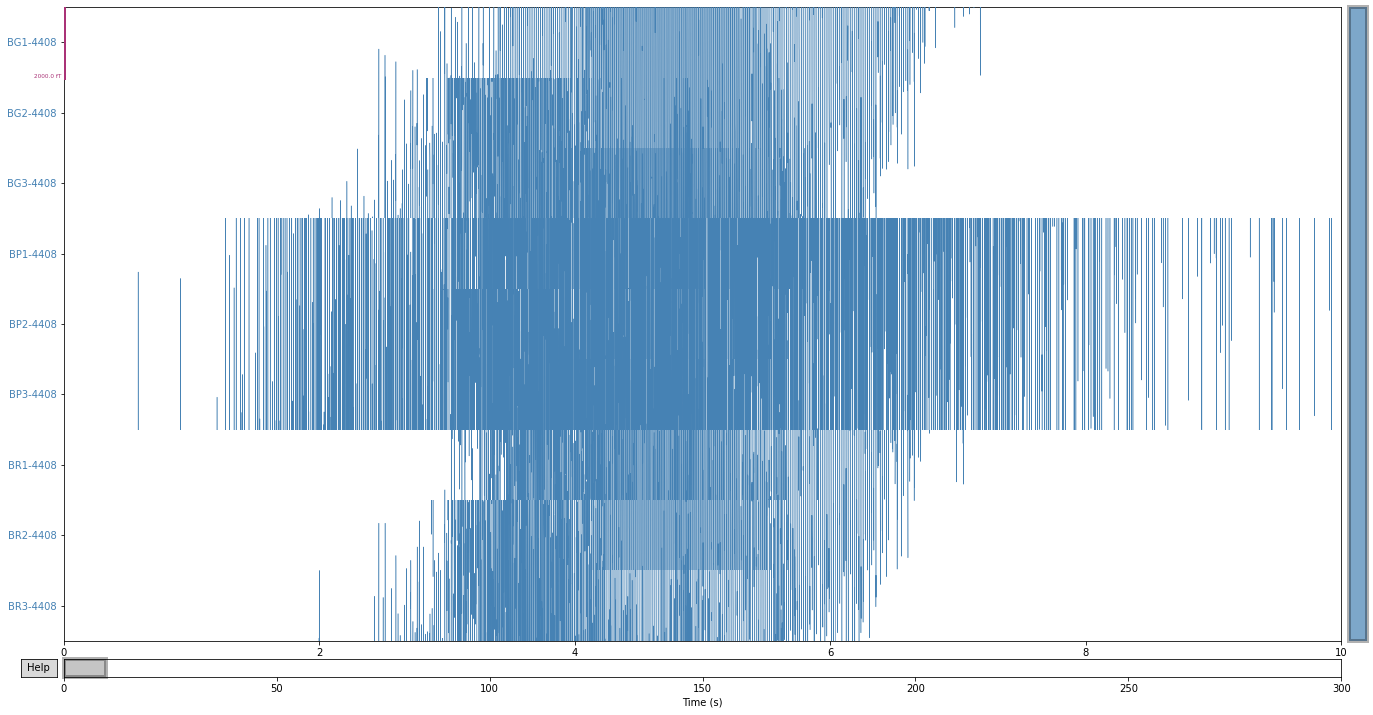

In [11]:
bad_ref = ['BG1-4408', 'BG2-4408', 'BG3-4408', 'BP1-4408', 'BP2-4408', 'BP3-4408', 'BR1-4408', 'BR2-4408', 'BR3-4408']

raw.copy().pick(bad_ref).plot(duration=10.0)

Removing 5 compensators from info because not all compensation channels were picked.


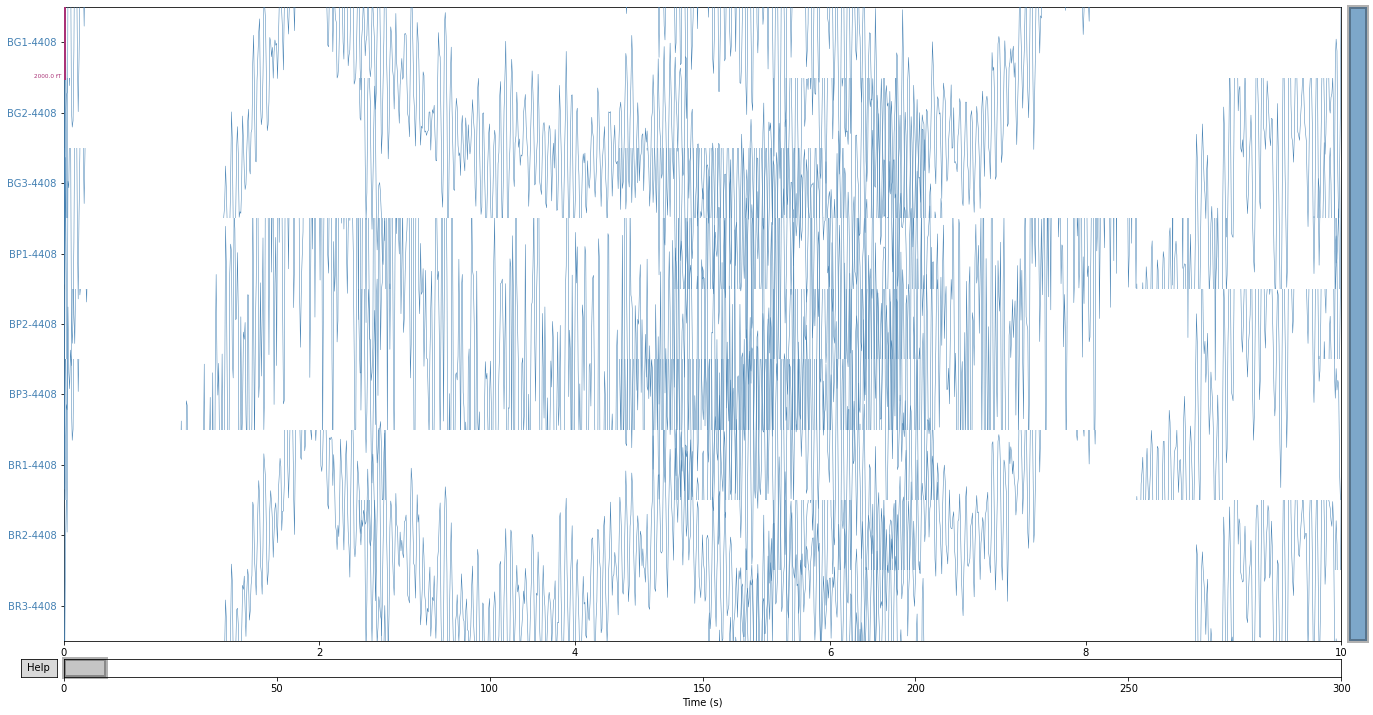

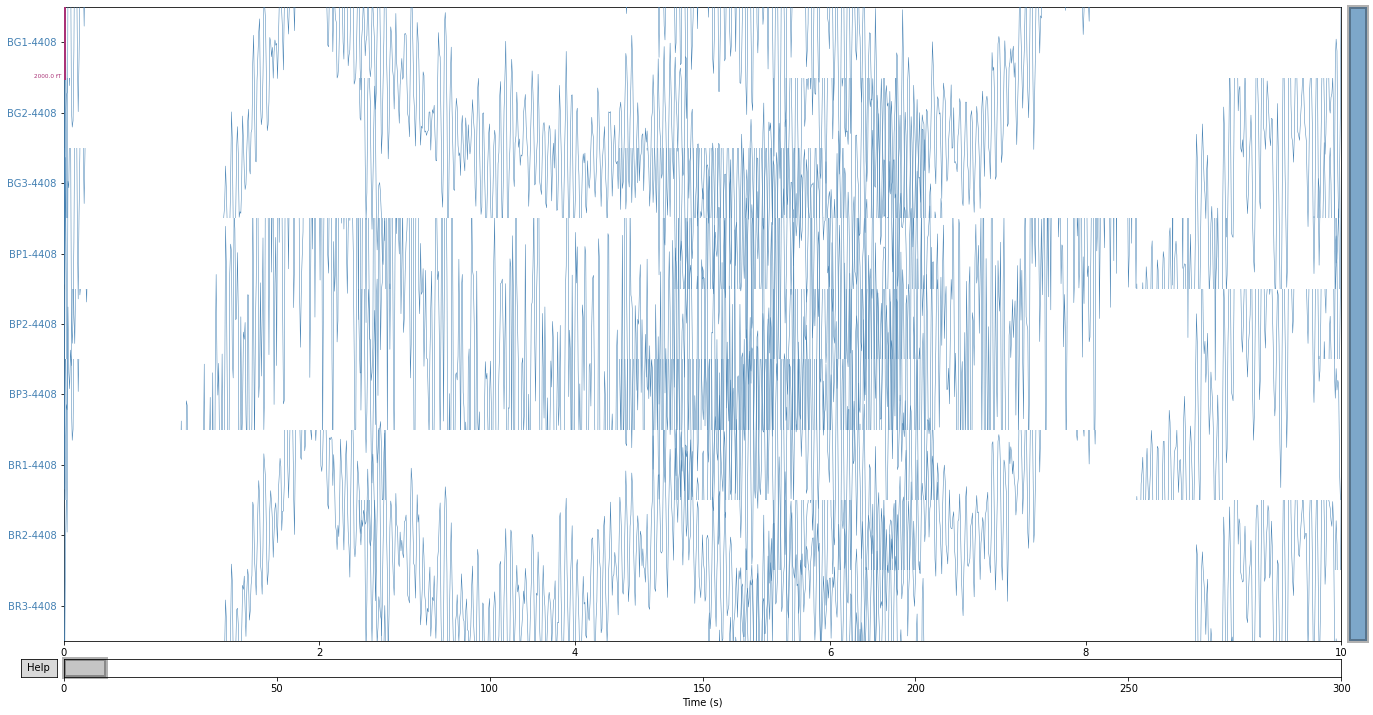

In [12]:
raw_filt.copy().pick(bad_ref).plot(duration=10.0)

Removing 5 compensators from info because not all compensation channels were picked.


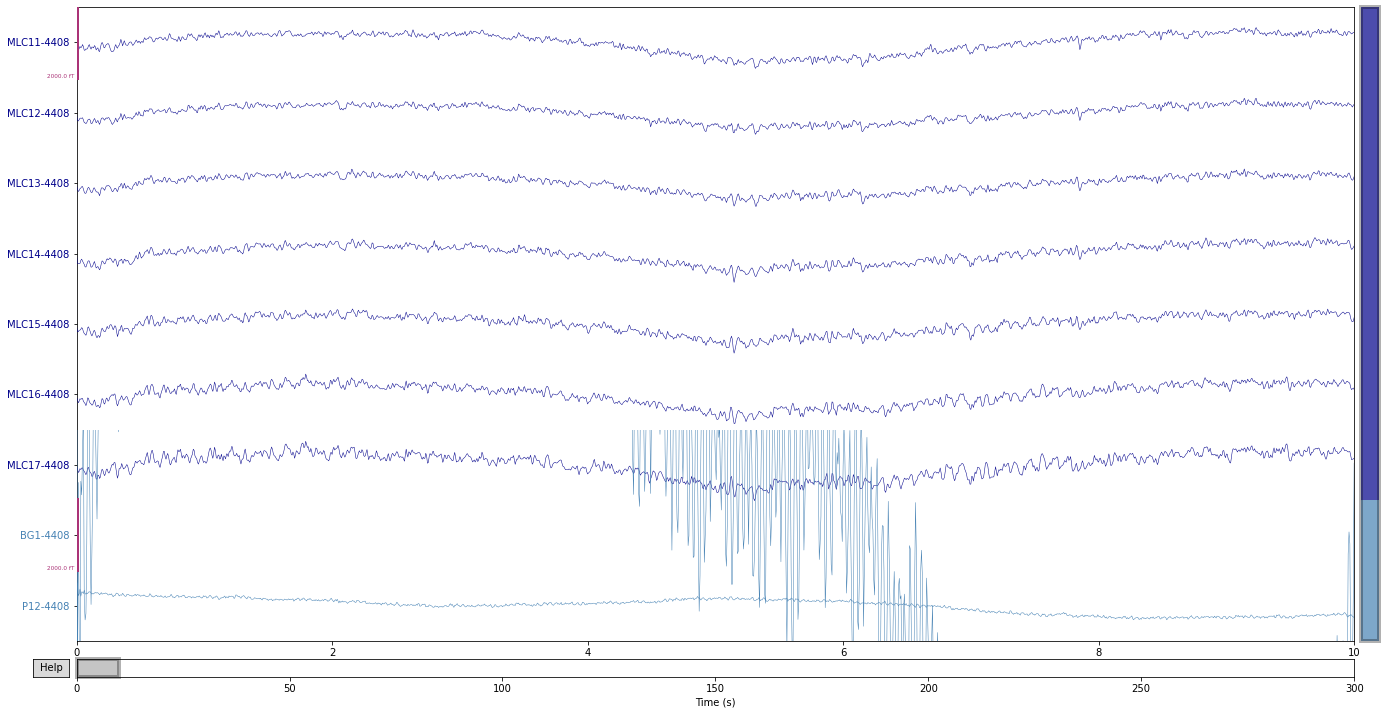

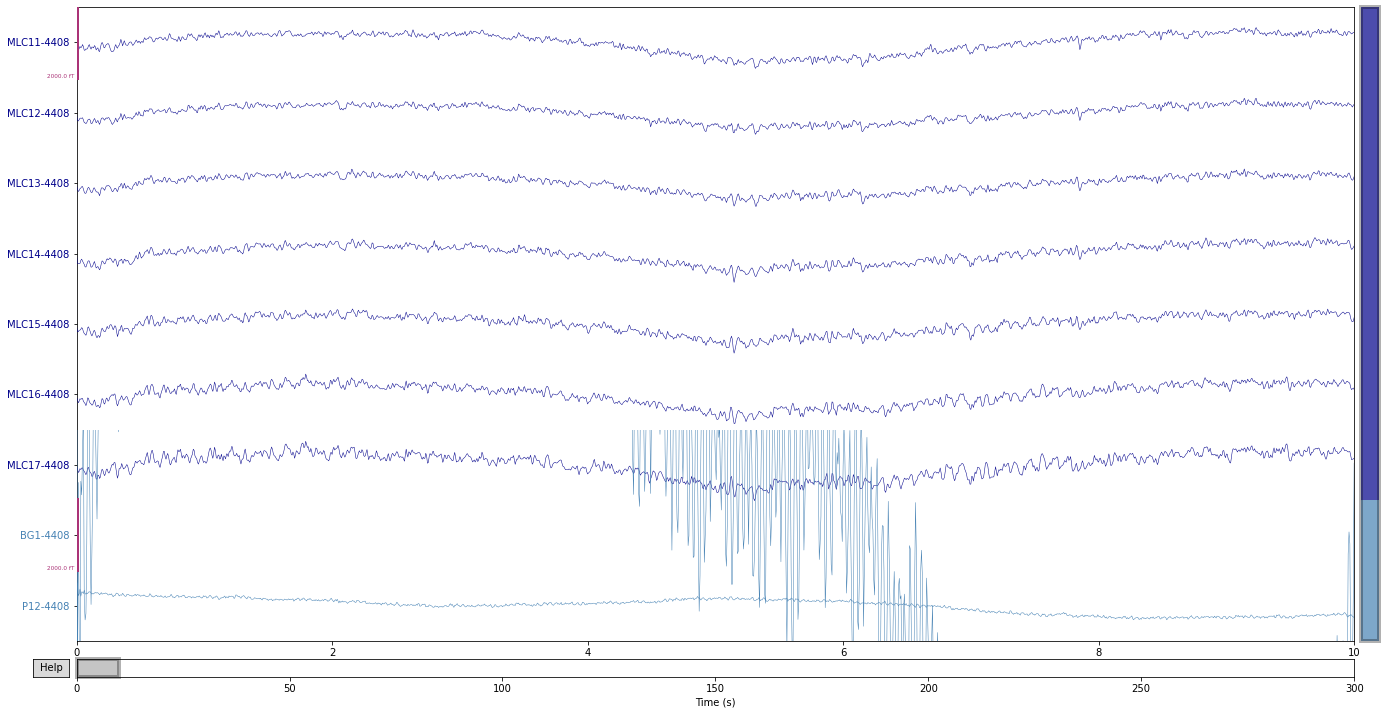

In [13]:
p = ['BG1-4408','P12-4408','MLC11-4408', 'MLC12-4408', 'MLC13-4408', 'MLC14-4408', 'MLC15-4408', 'MLC16-4408', 'MLC17-4408']

raw_filt.copy().pick(p).plot(duration=10.0)

In [11]:
raw_tog = raw.copy()
ica_kwargs = dict(
    method="picard",
    fit_params=dict(tol=1e-4),  # use a high tol here for speed
)
all_picks = mne.pick_types(raw_tog.info, meg=True, ref_meg=True)
ica_tog = ICA(n_components=60, max_iter="auto", allow_ref_meg=True, **ica_kwargs)
ica_tog.fit(raw_tog, picks=all_picks)

Fitting ICA to data using 294 channels (please be patient, this may take a while)


/tmp/ipykernel_45051/3145703173.py:8: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_tog.fit(raw_tog, picks=all_picks)


Selecting by number: 60 components
Fitting ICA took 86.0s.


<ICA | raw data decomposition, method: picard (fit in 52 iterations on 720000 samples), 60 ICA components (294 PCA components available), channel types: mag, no sources marked for exclusion>

Fitting ICA to data using 26 channels (please be patient, this may take a while)


/tmp/ipykernel_45051/3481556666.py:9: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_ref.fit(raw_sep, picks=ref_picks)


Selecting by number: 2 components
Fitting ICA took 3.1s.
... filtering ICA sources
Setting up low-pass filter at 49 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.25 Hz)
- Filter length: 24000 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up low-pass filter at 49 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.25 Hz)
- Filter length: 24000 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


... filtering ICA sources
Setting up low-pass filter at 49 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.25 Hz)
- Filter length: 24000 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up low-pass filter at 49 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.25 Hz)
- Filter length: 24000 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


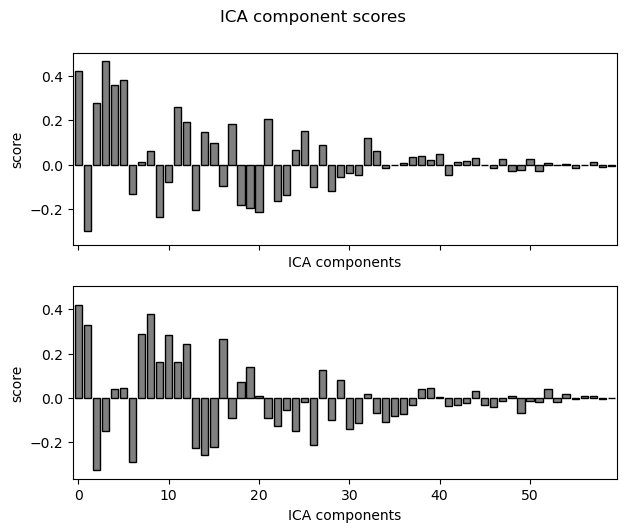

ValueError: No appropriate components found for the given picks ([])

In [17]:
# ICA on reference meg
# Separate algorithm

raw_sep = raw.copy()

# Do ICA only on the reference channels.
ref_picks = mne.pick_types(raw_sep.info, meg=False, ref_meg=True)
ica_ref = ICA(n_components=2, max_iter="auto", allow_ref_meg=True, **ica_kwargs)
ica_ref.fit(raw_sep, picks=ref_picks)

# Do ICA on both reference and standard channels. Here, we can just reuse
# ica_tog from the section above.
ica_sep = ica_tog.copy()

# Extract the time courses of these components and add them as channels
# to the raw data. Think of them the same way as EOG/EKG channels, but instead
# of giving info about eye movements/cardiac activity, they give info about
# external magnetic noise.
ref_comps = ica_ref.get_sources(raw_sep)
for c in ref_comps.ch_names:  # they need to have REF_ prefix to be recognised
    ref_comps.rename_channels({c: "REF_" + c})
raw_sep.add_channels([ref_comps])

# Now that we have our noise channels, we run the separate algorithm.
# ICA decomposition on MEG reference channels is used to assess external magnetic noise and remove it from the MEG
bad_comps, scores = ica_sep.find_bads_ref(raw_sep, method="separate", l_freq = 0, h_freq = 49)

# Plot scores with bad components marked.
ica_sep.plot_scores(scores, bad_comps)

# Examine the properties of removed components.
ica_sep.plot_properties(raw_sep, picks=bad_comps)

# Remove the components.
raw_sep = ica_sep.apply(raw_sep, exclude=bad_comps)


In [28]:
# Pas de mauvaises composantes -> c'est pour ca qu'au dessus ca ne marche pas
bad_comps

[]

In [19]:
# J'applique quand même l'ICA
raw_sep = ica_sep.apply(raw_sep, exclude=bad_comps)

Applying ICA to Raw instance
    Transforming to ICA space (60 components)
    Zeroing out 0 ICA components
    Projecting back using 294 PCA components


Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 3.413 (s)


/tmp/ipykernel_45051/439075464.py:1: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw.compute_psd(picks = 'meg', n_fft = 8192, fmin = 0.1, fmax = 49).plot()


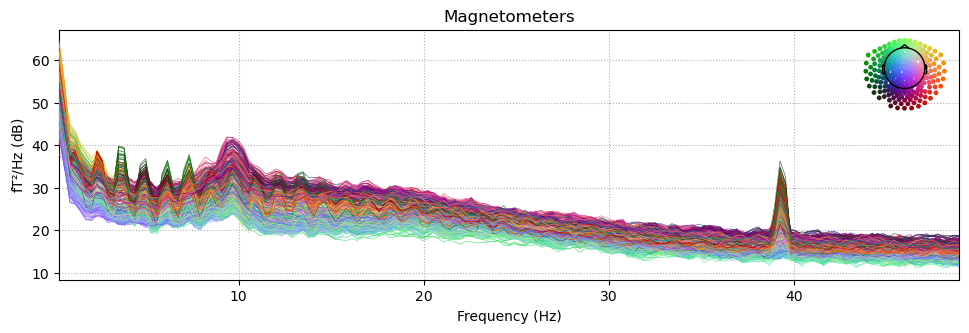

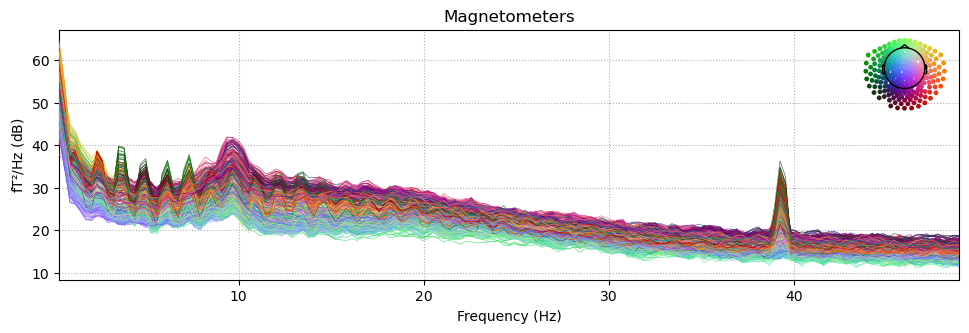

In [25]:
raw.compute_psd(picks = 'meg', n_fft = 8192, fmin = 0.1, fmax = 49).plot()

Removing 10 compensators from info because not all compensation channels were picked.


Effective window size : 3.413 (s)


/tmp/ipykernel_45051/1938618897.py:1: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw_sep.compute_psd(picks = 'meg', n_fft = 8192, fmin = 0.1, fmax = 49).plot()


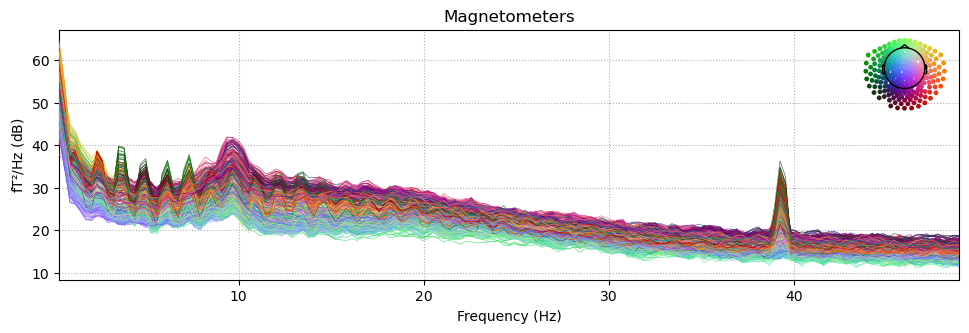

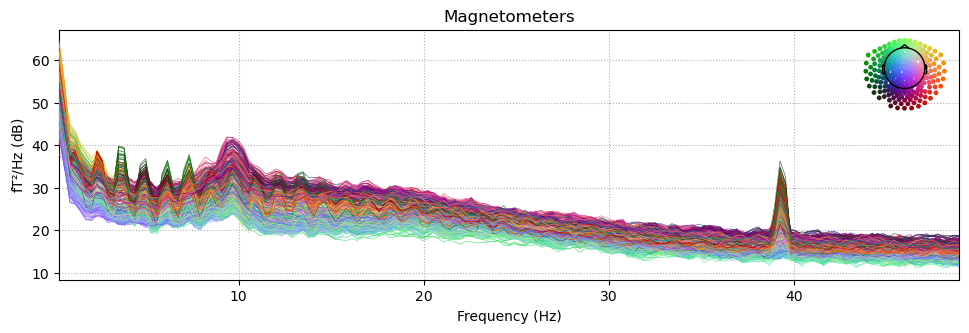

In [26]:
raw_sep.compute_psd(picks = 'meg', n_fft = 8192, fmin = 0.1, fmax = 49).plot()

Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 3.413 (s)
Removing 10 compensators from info because not all compensation channels were picked.


/tmp/ipykernel_45051/1351852765.py:5: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw.compute_psd(picks = 'meg', n_fft = 8192, fmin = 0.1, fmax = 49).plot(average = True, axes = ax, color = 'blue', ci = None)


Effective window size : 3.413 (s)


/tmp/ipykernel_45051/1351852765.py:6: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw_sep.compute_psd(picks = 'meg', n_fft = 8192, fmin = 0.1, fmax = 49).plot(average = True, axes = ax, color = 'red', ci = None)


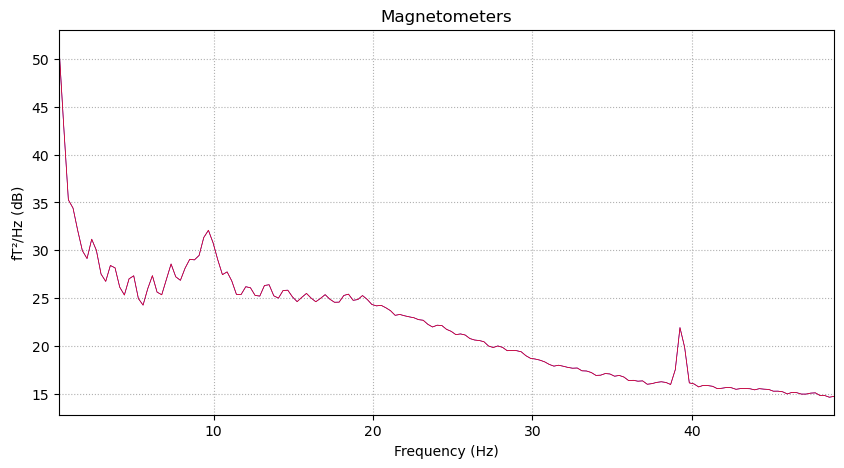

In [27]:
fig = plt.figure(figsize = (10,5))
ax = plt.subplot(1,1,1)
fig.add_subplot(ax)

raw.compute_psd(picks = 'meg', n_fft = 8192, fmin = 0.1, fmax = 49).plot(average = True, axes = ax, color = 'blue', ci = None)
raw_sep.compute_psd(picks = 'meg', n_fft = 8192, fmin = 0.1, fmax = 49).plot(average = True, axes = ax, color = 'red', ci = None)
plt.show()

In [ ]:
# SSP sur les ref_meg